In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [90]:
data=pd.read_csv("C:/Users/Lenovo/Desktop/data/aggregate_covid_country.csv")

In [91]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [92]:
data.shape

(23688, 5)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [94]:
data.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [95]:

data['Total Active'] = data['Confirmed'] - (data['Deaths'] + data['Recovered'])
total_active = data['Total Active'].sum()
print('Total number of active COVID 2020 cases across world:', total_active)
Tot_Cases = data.groupby('Country')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2020 cases across world: 115138622


,Total Active
Country,
US,45448120
United Kingdom,7777702
Italy,5973256
Russia,5801861
France,5017714
Spain,4818410
Brazil,3596467
Turkey,2820466
Germany,2623693


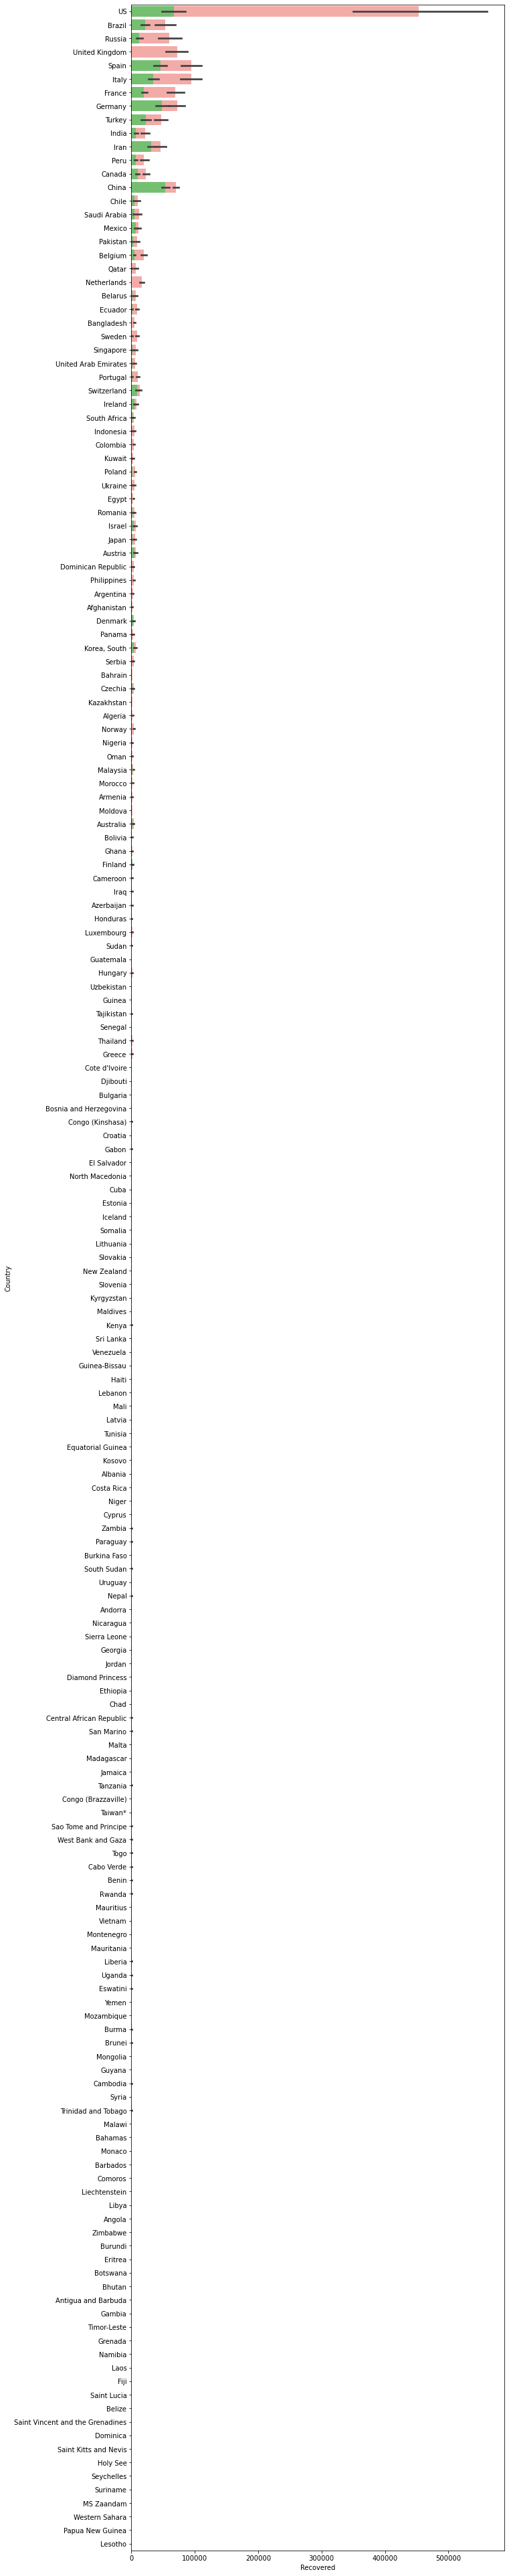

In [96]:
f, ax = plt.subplots(figsize=(10, 70))
data = data[['Country','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Country", data=data, label="Recovered", color="g")


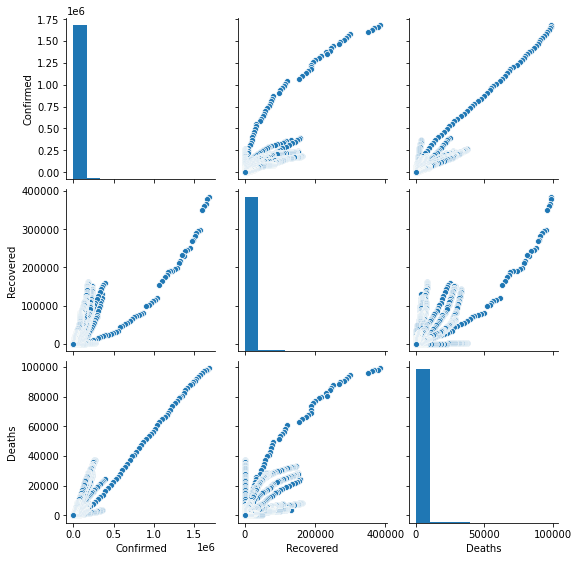

In [97]:
sns.pairplot(data)

In [99]:
data['Total Active'] = data['Confirmed'] - (data['Deaths'] + data['Recovered'])
total_active = data['Total Active'].sum()


In [100]:
df_grouped=data.groupby(['Country']).sum()
df_grouped.Confirmed

Country
Afghanistan           185236
Albania                41253
Algeria               240070
Andorra                41573
Angola                  1892
                       ...  
West Bank and Gaza     19971
Western Sahara           307
Yemen                   2696
Zambia                 15285
Zimbabwe                1760
Name: Confirmed, Length: 188, dtype: int64

In [101]:
df_grouped=data.groupby(['Country']).sum()
df_grouped.Recovered

Country
Afghanistan            20845
Albania                25688
Algeria               107345
Andorra                20751
Angola                   506
                       ...  
West Bank and Gaza      8798
Western Sahara           186
Yemen                     92
Zambia                  5281
Zimbabwe                 373
Name: Recovered, Length: 188, dtype: int64

In [102]:
df_grouped=data.groupby(['Country']).sum()
df_grouped.Deaths

Country
Afghanistan            4669
Albania                1629
Algeria               23232
Andorra                2219
Angola                  131
                      ...  
West Bank and Gaza      113
Western Sahara            1
Yemen                   460
Zambia                  215
Zimbabwe                199
Name: Deaths, Length: 188, dtype: int64

In [103]:
total=data['Confirmed']-(data['Recovered']+data['Deaths'])

In [104]:
total

23674    1197098
23486    1184925
23298    1178790
23110    1164286
22922    1154823
          ...   
5661           0
5662           0
5663           0
5664           0
0              0
Length: 23688, dtype: int64

In [105]:
plot=df_grouped.nlargest(5,'Confirmed')
plot

,Confirmed,Recovered,Deaths,Total Active
Country,,,,
US,57098767,8428678,3221969,45448120
Italy,11896347,4354815,1568276,5973256
Spain,11890691,5770271,1302010,4818410
United Kingdom,9150537,43829,1329006,7777702
Germany,9046257,6102898,319666,2623693


In [106]:
data.select_dtypes(include=['object']).columns



Index(['Country'], dtype='object')

In [107]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder

In [115]:
y_train=data['Total Active']

In [116]:
x_train=data.drop(['Country'],axis=1)

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2, random_state=0)

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [119]:

pip=Pipeline([('scaler2',StandardScaler()),('RandomForestRegressor:',RandomForestRegressor())])
pip.fit(x_train,y_train)
prediction=pip.predict(x_test)

In [120]:
acc=pip.score(x_test,y_test)
acc

0.9997372479580344